In [1]:
from random import uniform
import math

All_Lost = 0
BasicOptOfferPrice = 35
BasicOptOfferVol = 50
BasicStore = 80
InitAccount = 10000
InitQualification = 10
Max_Qualification = 100
Max_Demand = 30
MeanDPrice = 100
OptOfferAcceptDecision = 1 # Bool
OptOfferBaseVolume = 40
RentRate = 200
Ret_Price = 100  # Розничная цена
ShopStore = 30
STOP_SELL = 0 # Bool
TransferDecision = 1 # Bool
TransferRate = 150
TransferVol = 30 # Объем перевозки
VagesAndTaxes = 500
dt = 1
TIME = 0

In [2]:
timer = 100

Account = InitAccount
Qualification = InitQualification

BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
AddPriceByTime = BasicOptOfferPrice * 0.03 * TIME + BasicOptOfferPrice * 0.01 * TIME * uniform(0, 1)
OfferOnePrice = AddPriceByTime + BasicPriceRnd
RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
OfferFullPrice = OfferOnePrice * RndOfferVolume
OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
GoodsTransfer = math.floor(TransferActualVolue)
Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

QualSpending = round(Account * uniform(0.05, 0.2))
IncreaseQual = min(Max_Qualification-Qualification, (QualSpending/Account)*10)

Demand = round(Max_Demand * (1 - 1 / (1 + Qualification/Max_Qualification*10 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
RND_Demand = round(Demand * uniform(0.7, 1.2))
SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
Selling = SoldRet
Income = Ret_Price * SoldRet

DailySpending = min(RentRate + VagesAndTaxes, Account)
TransSpend = TransferRate if TransferActualVolue > 0 else 0

print("-----------INITIAL DATA-----------")
print("-----------LEVEL VALUES-----------")
print(f"Account = {Account}")
print(f"BasicStore = {BasicStore}")
print(f"ShopStore = {ShopStore}")
print(f"Qualification = {Qualification}")
print("---------CHANGEABLE VALUES--------")
print(f"TransferVolume = {TransferVol}")
print(f"Ret_Price = {Ret_Price}")
print(f"STOP_SELL = {bool(STOP_SELL)}")
print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
print(f"TransferDecision = {bool(TransferDecision)}")
print("---------AUXILIARY VALUES---------")
print(f"RndOfferVolume = {RndOfferVolume}")
print(f"OfferFullPrice = {OfferFullPrice}")
print(f"OfferOnePrice = {OfferOnePrice}")
print(f"RND_Demand = {RND_Demand}")
print()

-----------INITIAL DATA-----------
-----------LEVEL VALUES-----------
Account = 10000
BasicStore = 80
ShopStore = 30
Qualification = 10
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOfferAcceptDecision = True
TransferDecision = True
---------AUXILIARY VALUES---------
RndOfferVolume = 40
OfferFullPrice = 1409.4260584730778
OfferOnePrice = 35.23565146182695
RND_Demand = 17



In [3]:
def params_changing(text):
    if input(text).lower() == 'y':
        return True
    else:
        return False

In [4]:
account_data = [Account]
qualification_data = [Qualification]
demand_data = [Demand]

flag = params_changing("Do you want to change parameters during process? Y/N")

for TIME in range(1, timer + 1):
    if flag:
        change_params = params_changing(f'Do you want to change parameters on {TIME} itereration?')
        if change_params:
            TransferVol = float(input(f"Write TransferVolume"))
            Ret_Price = float(input(f"Write Ret_Price"))
            STOP_SELL = 1 if input(f"Write STOP_SELL (y/n)").lower() == 'y' else 0
            OptOfferAcceptDecision = 1 if input(f"Write OptOfferAcceptDecision (y/n)").lower() == 'y' else 0
            TransferDecision = 1 if input(f"Write TransferDecision (y/n)").lower() == 'y' else 0
    Account += dt * (Income - DailySpending - TransSpend - QualSpending)
    BasicStore += dt * (SmallOptIncom - GoodsTransfer)
    ShopStore += dt * (GoodsTransfer - Selling - Lost)
    Qualification += dt * IncreaseQual
    All_Lost += dt * Lost

    BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
    AddPriceByTime = BasicOptOfferPrice * 0.03 * TIME + BasicOptOfferPrice * 0.01 * TIME * uniform(0, 1)
    OfferOnePrice = AddPriceByTime + BasicPriceRnd
    RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
    OfferFullPrice = OfferOnePrice * RndOfferVolume
    OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
    SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

    TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
    GoodsTransfer = math.floor(TransferActualVolue)
    Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

    QualSpending = round(Account * uniform(0.05, 0.2))
    IncreaseQual = min(Max_Qualification-Qualification, (QualSpending/Account)*10)

    Demand = round(Max_Demand * (1 - 1 / (1 + Qualification/Max_Qualification*10 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
    RND_Demand = round(Demand * uniform(0.7, 1.2))
    SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
    Selling = SoldRet
    Income = Ret_Price * SoldRet

    DailySpending = min(RentRate+VagesAndTaxes, Account)
    TransSpend = TransferRate if TransferActualVolue > 0 else 0

    account_data.append(Account)
    qualification_data.append(Qualification)
    demand_data.append(Demand)

    print(f"-------DATA ON STEP {TIME}-------")
    print("-----------LEVEL VALUES-----------")
    print(f"Account = {Account}")
    print(f"BasicStore = {BasicStore}")
    print(f"ShopStore = {ShopStore}")
    print(f"Qualification = {Qualification}")
    print("---------CHANGEABLE VALUES--------")
    print(f"TransferVolume = {TransferVol}")
    print(f"Ret_Price = {Ret_Price}")
    print(f"STOP_SELL = {bool(STOP_SELL)}")
    print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
    print(f"TransferDecision = {bool(TransferDecision)}")
    print("---------AUXILIARY VALUES---------")
    print(f"RndOfferVolume = {RndOfferVolume}")
    print(f"OfferFullPrice = {OfferFullPrice}")
    print(f"OfferOnePrice = {OfferOnePrice}")
    print(f"RND_Demand = {RND_Demand}")
    print()

-------DATA ON STEP 1-------
-----------LEVEL VALUES-----------
Account = 10248
BasicStore = 90
ShopStore = 43
Qualification = 10.602
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOfferAcceptDecision = True
TransferDecision = True
---------AUXILIARY VALUES---------
RndOfferVolume = 45
OfferFullPrice = 2598.1954823946426
OfferOnePrice = 57.73767738654762
RND_Demand = 22

-------DATA ON STEP 2-------
-----------LEVEL VALUES-----------
Account = 10258
BasicStore = 105
ShopStore = 51
Qualification = 11.909572209211554
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOfferAcceptDecision = True
TransferDecision = True
---------AUXILIARY VALUES---------
RndOfferVolume = 43
OfferFullPrice = 1875.0435591706357
OfferOnePrice = 43.60566416675897
RND_Demand = 21

-------DATA ON STEP 3-------
-----------LEVEL VALUES-----------
Account = 10603
BasicStore = 118
ShopStore = 60
Qualification = 12.791810462282328
--

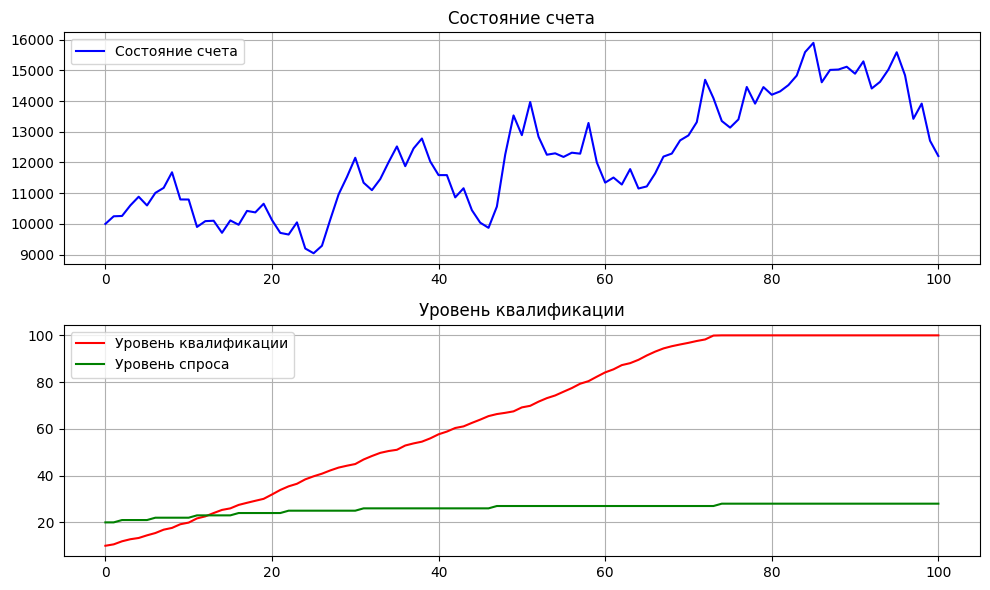

In [6]:
import matplotlib.pyplot as plt

# Создание первого графика для состояния счета и состояния налогов
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(account_data, label='Состояние счета', color='blue')
plt.title('Состояние счета')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(qualification_data, label='Уровень квалификации', color='red')
plt.plot(demand_data, label='Уровень спроса', color='green')
plt.title('Уровень квалификации')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()